<a href="https://colab.research.google.com/github/reza1200/P400-9-5-2018-Vector-Stack/blob/Stack/DogBreedP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dog Breed Prediction:
Project Objectives and Scope:
In this project, I will utilize Keras and TensorFlow to build, train, and test a Convolutional Neural Network (CNN) capable of identifying the breed of a dog in a supplied image. This involves addressing a supervised learning problem, specifically a multiclass classification challenge.
Steps:
1- Loading the data from Kaggle.
2-Load labales CSV from labales that contain image and breed.
3-Checking the breed count
4- One-Hot encooding on labels data prediction column.
5-Load the images,convert them to an array and normalize it.
6-Chacke the shape and size of the X and Y data.
7-Building a model network architectur,
8-Split the data and fit in into the model and creat an accuracy plot.
9-Evaluate the model for accuracy score.
10- Uning the model for prediction.


In [ ]:
# Select the kaggle.json downloaded
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezasalmanian","key":"abebcda6252f4d7feba0b4351abf789e"}'}

In [ ]:
#install kaggle API client

!pip install -q kaggle

Setting up kaggle using kaggle API

In [ ]:
# The kaggle API client expects this file to be on ~/.kaggle , move it there
!mkdir -p ~/.kaggle #~/.kaggle/kaggle.json
!cp kaggle.json ~/.kaggle/

#This permissions change avoids a warning on kaggle tool startup

!chmod 600 ~/.kaggle/kaggle.json

Store the data in new diractory and make it as a current diractory

In [ ]:
#Creating diractory and changing the current working diractory
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [ ]:
#Searching the Kaggle for dataset
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           5122          8  0.1764706        


In [ ]:
#Download dataset with the refrance that we found on the search and getting off of diractory
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

 98% 675M/691M [00:05<00:00, 140MB/s]
100% 691M/691M [00:05<00:00, 124MB/s]
/content


Unziping data and remove an irrelevant files

In [ ]:
#unzip downloaded file and removing un-usable file
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv



Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

In [ ]:
#building our model
#imports important librares
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#from tqdm import tqdm
#from keras.preprocessing import image
#from sklearn.preprocessing import label_binarize
#from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
#from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam



In [ ]:
#Read the labels.csv file and checking shape and records

labels_all = pd.read_csv("dog_dataset/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
#visualize the number of each breeds

breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

find the count pe class and total data in each class by using value_count() function

In [ ]:
#Selecting 3 breeds
#Making new list CLASS_NAME

CLASS_NAME = ['scottish_deerhound','maltese_dog','afghan_hound']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAME))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,146,0379145880ad3978f9b80f0dc2c03fba,afghan_hound


from matplotlib import pyplot as plt
_df_0['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('breed').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='level_0', y='index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['level_0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'level_0'}, axis=1)
              .sort_values('level_0', ascending=True))
  xs = counted['level_0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('level_0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['level_0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'level_0'}, axis=1)
              .sort_values('level_0', ascending=True))
  xs = counted['level_0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('level_0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('breed')):
  _plot_series(series, series_name, i)
  fig.legend(title='breed', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('breed')):
  _plot_series(series, series_name, i)
  fig.legend(title='breed', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['level_0'].plot(kind='line', figsize=(8, 4), title='level_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['breed'].value_counts()
    for x_label, grp in _df_11.groupby('id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('id')
_ = plt.ylabel('breed')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='level_0', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['breed'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='level_0', y='breed', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='index', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['breed'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='breed', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

As we are working with the classification dataset first we need to one hot encoded the target value,the classes. After that we will read and convert them into numpy array and finaly normalizing the array.

In [ ]:
#Creating nump matrix with zero

X_data = np.zeros((len(labels),224,224,3), dtype = 'float32')

#One hot encoding

Y_data = label_binarize(labels['breed'],classes = CLASS_NAME)

#reading and converting image to numpy array and normalizing dataset
#looping

for i in tqdm(range(len(labels))):
  img = image.load_img('dog_dataset/train/%s.jpg' % labels['id'][i], target_size =(224,224))
  img = image.img_to_array(img)
  x = np.expand_dims(img.copy(), axis=0)
  X_data[i] = x/255.0

#printing train image and one hot encoded shape and size

print('\nTrain Image shape: ' ,X_data.shape,' size: {:,}'.format(X_data.size))
print('One hot encoded output shape :',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 359/359 [00:00<00:00, 506.45it/s]



Train Image shape:  (359, 224, 224, 3)  size: 54,039,552
One hot encoded output shape : (359, 3)  size: 1,077


I created a network architecture for the model, utilizing different types of layers based on their features, namely Conv2D. Conv2D is used to create a convolutional kernel that convolves with the input layer to produce the output tensor. MaxPooling2D is a downsampling technique that extracts the maximum value over the window defined by the pool size. Flatten is employed to take input and generate a 1D output. Dense layers also produce output as the dot product of the input and kernel.

In [ ]:
#Building the model



# Assuming CLASS_NAME is defined elsewhere in your code

My_model = Sequential()

My_model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)))
My_model.add(MaxPooling2D(pool_size=(2, 2)))

My_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'))  # Corrected
My_model.add(MaxPooling2D(pool_size=(2, 2)))

My_model.add(Conv2D(filters=16, kernel_size=(7, 7), activation='relu', kernel_regularizer='l2'))  # Corrected
My_model.add(MaxPooling2D(pool_size=(2, 2)))

My_model.add(Conv2D(filters=8, kernel_size=(5, 5), activation='relu', kernel_regularizer='l2'))  # Corrected
My_model.add(MaxPooling2D(pool_size=(2, 2)))

My_model.add(Flatten())
My_model.add(Dense(128, activation="relu", kernel_regularizer='l2'))  # Corrected
My_model.add(Dense(64, activation="relu", kernel_regularizer='l2'))  # Corrected
# In multiclass classification, the activation function for the output layer should be softmax
My_model.add(Dense(len(CLASS_NAME), activation="softmax"))

My_model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

My_model.summary()







Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 16)       

In [ ]:
# Spliting the data into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data,test_size= 0.1)
# Spliting the trained and tested data into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val , test_size= 0.2)

In [ ]:
#Training our model and save it to our history
epochs = 100
batch_size = 128

history = My_model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (X_val, Y_val))


Epoch 1/100
3/3 [==============================] - 14s 1s/step - loss: 4.8877 - accuracy: 0.2791 - val_loss: 4.8617 - val_accuracy: 0.2615
Epoch 2/100
3/3 [==============================] - 0s 142ms/step - loss: 4.8522 - accuracy: 0.3062 - val_loss: 4.8335 - val_accuracy: 0.2615
Epoch 3/100
3/3 [==============================] - 0s 143ms/step - loss: 4.8246 - accuracy: 0.3101 - val_loss: 4.8062 - val_accuracy: 0.3385
Epoch 4/100
3/3 [==============================] - 0s 140ms/step - loss: 4.7956 - accuracy: 0.3527 - val_loss: 4.7749 - val_accuracy: 0.3231
Epoch 5/100
3/3 [==============================] - 0s 144ms/step - loss: 4.7655 - accuracy: 0.3837 - val_loss: 4.7443 - val_accuracy: 0.3231
Epoch 6/100
3/3 [==============================] - 0s 143ms/step - loss: 4.7363 - accuracy: 0.3605 - val_loss: 4.7169 - val_accuracy: 0.2769
Epoch 7/100
3/3 [==============================] - 0s 147ms/step - loss: 4.7094 - accuracy: 0.3527 - val_loss: 4.6916 - val_accuracy: 0.2769
Epoch 8/100
3/3

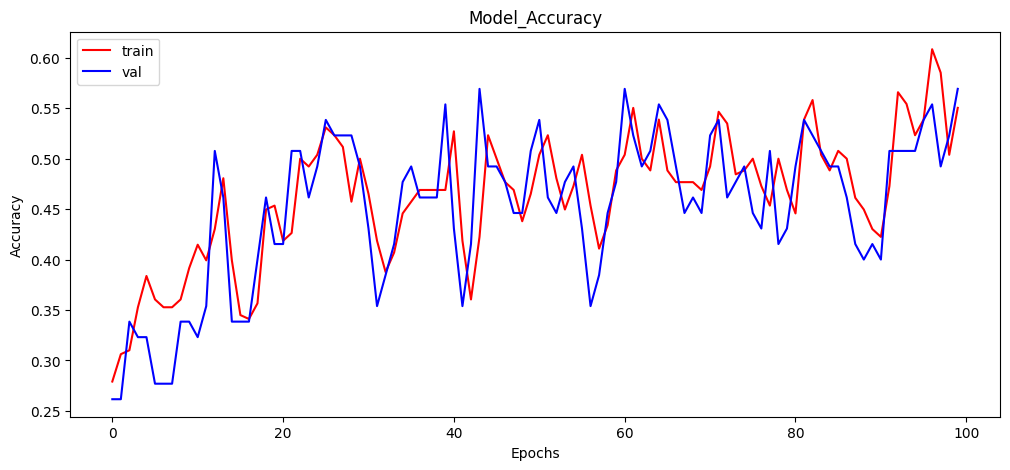

In [ ]:
#Validation accuracy according to each Epoch

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])

plt.show()



In [ ]:
#Using predict function to make predictionsmodel and finding the accuracy on the model

Y_pred = My_model.predict(X_test)
score = My_model.evaluate(X_test,Y_test)
print('Accuracy over the test set: \n', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 11ms/step - loss: 3.0081 - accuracy: 0.5278
Accuracy over the test set: 
 52.78 %


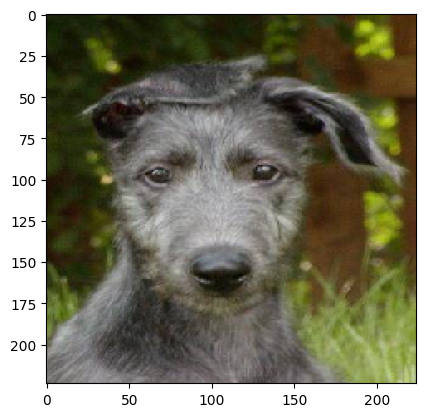

Orginally : scottish_deerhound
Predicted: maltese_dog


In [ ]:
#Ploting the image to compare

plt.imshow(X_test[1,:,:,:])
plt.show()

#finding the max value from prediction and comparing orginal view vs predicted

print("Orginally :",labels['breed'][np.argmax(Y_test[1])])
print("Predicted:",labels['breed'][np.argmax(Y_pred[1])])

In [ ]:
#Creating flask App

My_model.save("dog_breed.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
